In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
train_df = pd.read_csv('TrainingRidge.csv')
train_x = train_df[['x1', 'x2']]
train_y = train_df['obs']
val_df = pd.read_csv('ValidationRidge-Y.csv')
val_x = val_df[['x1', 'x2']]
val_y = val_df['dens']

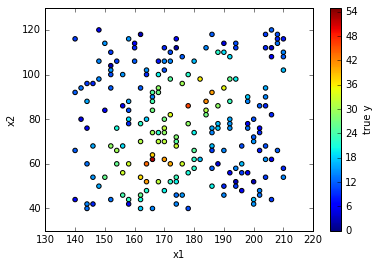

In [37]:
plt.scatter(train_x['x1'], train_x['x2'], c=train_y, vmin=0, vmax=55)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

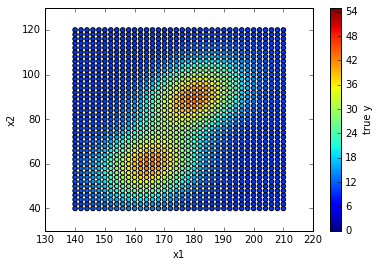

In [38]:
plt.scatter(val_x['x1'], val_x['x2'], c=val_y, vmin=0, vmax=55)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

a) Train the ν-SVR on the training set with the standard parameters of your library

In [41]:
from sklearn.svm import SVR

In [42]:
svr = SVR()
svr.fit(train_x, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

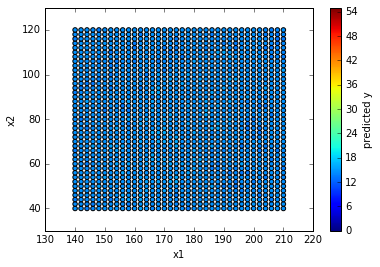

In [43]:
pred_val_y = svr.predict(val_x)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y, vmin=0, vmax=55)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

The predicted values are almost the same across the entire space (if you look at smaller differences in y, you can see that the SVR overfits).

b) Perform a 10-fold nested cross-validation

In [12]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {'C': 2.**np.arange(-2, 12.1, 1), 'gamma': 2.**np.arange(-12, 1.1, 1)}
grid_search = GridSearchCV(SVR(epsilon=0.5), params, cv=10)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02,   5.12000e+02,
         1.02400e+03,   2.04800e+03,   4.09600e+03]), 'gamma': array([  2.44141e-0...    6.25000e-02,   1.25000e-01,   2.50000e-01,   5.00000e-01,
         1.00000e+00,   2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

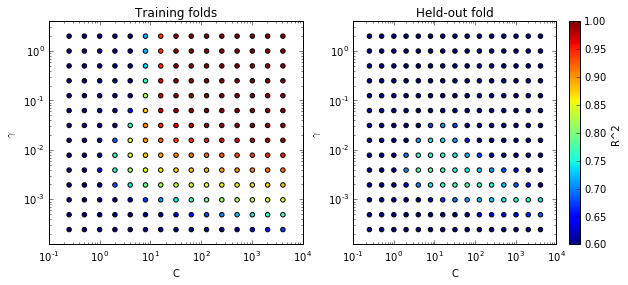

In [32]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Training folds')
plt.scatter(grid_search.cv_results_['param_C'], grid_search.cv_results_['param_gamma'], c=grid_search.cv_results_['mean_train_score'], vmin=0.6, vmax=1.)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2.**-13, 2.**2)
plt.xlabel('C')
plt.ylabel(r'$\gamma$')

plt.subplot(122)
plt.title('Held-out fold')
plt.scatter(grid_search.cv_results_['param_C'], grid_search.cv_results_['param_gamma'], c=grid_search.cv_results_['mean_test_score'], vmin=0.6, vmax=1.)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2.**-13, 2.**2)
plt.xlabel('C')
plt.ylabel(r'$\gamma$')
plt.colorbar(label='R^2')

c) Find the best parameter combination

In [35]:
grid_search.best_params_

{'C': 8.0, 'gamma': 0.00390625}

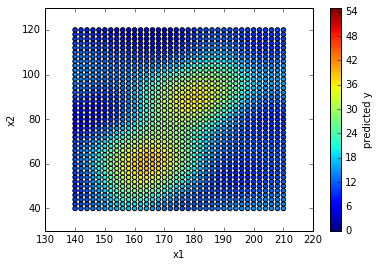

In [44]:
best_svr = grid_search.best_estimator_

pred_val_y = best_svr.predict(val_x)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y, vmin=0, vmax=55)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

The predicted values match the ground truth almost perfectly.